In [1]:
import uproot
import tensorflow as tf
tf.random.set_seed(123)
import numpy as np
np.set_printoptions(suppress=True) # print arrays without e notation
np.set_printoptions(threshold=10000)
import pandas as pd
pd.set_option('display.max_columns', None)  
import matplotlib.pyplot as plt
import os.path

In [2]:
signal_file = uproot.open("/Users/eric/C1C1_WW/Trees_v13_1509/C1C1_100_10_WEIGHTS.root")
signal_file = signal_file['C1C1_100_10_WEIGHTS;1']
    
VV_file = uproot.open("/Users/eric/C1C1_WW/Trees_v13_1509/VV_WEIGHTS.root")
VV_file = VV_file['VV_WEIGHTS;9']

ttbar_file = uproot.open("/Users/eric/C1C1_WW/Trees_v13_1509/ttbar_WEIGHTS.root")
ttbar_file = ttbar_file['ttbar_WEIGHTS;9']

#signal_file = uproot.open("/Volumes/Samsung/C1C1_WW/Trees_v13_1509/signalSyst/signal_systs.root")
#VV_file = uproot.open("/Volumes/Samsung/C1C1_WW/Trees_v13_1509/theoryExpCombined/VV_theoryExp.root")
#ttbar_file = uproot.open("/Volumes/Samsung/C1C1_WW/Trees_v13_1509/theoryExpCombined/ttbar_theoryExp.root")
#Wt_file = uproot.open("/Volumes/Samsung/C1C1_WW/Trees_v13_1509/theoryExpCombined/Wt_theoryExp.root")
#Zjets_file = uproot.open("/Volumes/Samsung/C1C1_WW/Trees_v13_1509/theoryExpCombined/Zjets_theoryExp.root")
#VVV_file = uproot.open("/Volumes/Samsung/C1C1_WW/Trees_v13_1509/withSyst/VVV.root")
#Zttjets_file = uproot.open("/Volumes/Samsung/C1C1_WW/Trees_v13_1509/withSyst/Zttjets.root")
#other_file = uproot.open("/Volumes/Samsung/C1C1_WW/Trees_v13_1509/withSyst/other.root")

#signal_file = signal_file['C1C1_100_10_WEIGHTS;1']
#VV_file = VV_file['VV_WEIGHTS;1']
#ttbar_file = ttbar_file['ttbar_WEIGHTS;1']

In [3]:
# Check if EventNumber is unique

# IT'S NOT UNIQUE !!

#signal_data = {} #dictionary
#for feature in features:
#    signal_data[feature] = np.array(signal_file[feature]) #fill the dictionary

#signal_df = pd.DataFrame(signal_data) #create the dataframe
#signal_df['iD'] = np.full(len(signal_df.index),1) # 1 = signal, 0 = background
#signal_df['Sample'] = np.full(len(signal_df.index),"C1C1_100_10")
#signal_df['EventNumber'] = np.array(signal_file['EventNumber'])
#signal_df


#fig, axs = plt.subplots()
#axs.hist(signal_df['EventNumber'],bins=30,alpha=0.6,color='orangered')
#plt.show()

In [4]:
features = ['lep1pT','lep2pT','MET','METsig','DPhib','MT2','BDTDeltaM30']
N_ENTRIES_SIG_TRAIN = 15000
N_ENTRIES_BKG_TRAIN = 80000

In [5]:
signal_data = {} #dictionary
for feature in features:
    signal_data[feature] = np.array(signal_file[feature]) #fill the dictionary

signal_df = pd.DataFrame(signal_data) #create a 
signal_df['iD'] = np.full(len(signal_df.index),1)
signal_df

lep1pT     lep2pT         MET    METsig     DPhib        MT2  \
0       73.609718  45.423298   70.389450  7.000961  2.102085  65.001419   
1       90.362343  80.250267   66.593758  6.576715  0.056807  28.005203   
2      144.737686  57.063747   48.827950  3.289643  2.098679   0.233685   
3       62.507576  12.994293   67.977264  6.748414  2.465740  46.948978   
4       55.535378  21.134953   40.985008  4.076075  1.896668  25.196234   
...           ...        ...         ...       ...       ...        ...   
31527   50.297905  26.940948   85.885712  6.943843  0.678786  64.192703   
31528   73.125954  25.423283   73.187996  5.901683  2.380257  63.590439   
31529   50.518356  33.794903   56.438660  4.800375  2.964129  67.080162   
31530   34.233837  24.132088  102.623230  8.439701  0.282024  73.993118   
31531  181.947891  37.178783   78.134636  4.352456  0.448730  36.779465   

       BDTDeltaM30  iD  
0         0.521586   1  
1         0.577584   1  
2         0.569459   1  
3         0.281404   1  
4         0.431991   1  
...            ...  ..  
31527     0.000183   1  
31528     0.000169   1  
31529     0.000076   1  
31530     0.000110   1  
31531     0.001384   1  

[31532 rows x 8 columns]

In [6]:
bkg_data = {}
for feature in features:
    bkg_data[feature] = np.concatenate((np.array(VV_file[feature]),np.array(ttbar_file[feature])))

bkg_df = pd.DataFrame(bkg_data)
bkg_df['iD'] = np.full(len(bkg_df.index),0)
bkg_df

lep1pT     lep2pT         MET    METsig     DPhib        MT2  \
0         59.078079  31.822832   40.321709  3.387405  1.979913  40.835056   
1         30.359299  19.849819   34.510422  3.430850  2.419240  35.980831   
2         46.625546   9.596267   36.656677  3.607089  2.648720  10.651604   
3         31.296329  13.092647   30.332579  3.029070  2.080038  24.876068   
4         47.931690  15.234454   46.149456  4.592144  1.339840  27.592640   
...             ...        ...         ...       ...       ...        ...   
1747320   99.808540  12.073832   94.595840  7.364731  2.806813  63.344707   
1747321  128.595078  32.629875   65.385132  5.500661  1.600464  28.338921   
1747322   70.635284  64.060532  137.265900  7.534775  0.018456  41.689217   
1747323   55.749294  19.952198  179.038712  9.917265  0.370654  95.330635   
1747324   68.534508  33.479336   50.550526  4.523543  0.181721   4.788114   

         BDTDeltaM30  iD  
0           0.527812   0  
1           0.302543   0  
2           0.288442   0  
3           0.318167   0  
4           0.505692   0  
...              ...  ..  
1747320     0.000226   0  
1747321     0.008126   0  
1747322     0.007649   0  
1747323     0.000172   0  
1747324     0.006704   0  

[1747325 rows x 8 columns]

In [7]:
signal_df.shape

(31532, 8)

In [8]:
bkg_df.shape

(1747325, 8)

In [9]:
bkg_df = bkg_df.sample(frac=1) # shuffle, or you'll take only the first bkgs added
bkg_df

lep1pT     lep2pT         MET     METsig     DPhib        MT2  \
359      103.594093  62.640697   93.126373   9.134759  1.891831  84.734528   
108799    45.482220  33.838326  106.804253   3.327868  0.234955  77.222214   
1510556   54.169033  44.202606   41.124950   3.607441  1.096385  42.550888   
604549    46.995941  36.816521   45.503128   4.517690  2.204980  46.910812   
633434    52.790554  25.727650   57.197388   5.647081  2.299245  53.813442   
...             ...        ...         ...        ...       ...        ...   
845735    83.636177  25.893391   75.875267   7.095237  1.978644  75.519836   
1057239   69.167564  53.489147   53.521347   4.460044  1.579496  68.124458   
847948   102.563850  70.278587  181.821304  11.827878  0.419010  42.508759   
1275661   31.149351  23.242243   44.461868   3.983478  0.135503  26.425453   
986685    62.090992  51.148678   48.684196   4.154464  2.914294  62.426910   

         BDTDeltaM30  iD  
359         0.612083   0  
108799      0.409217   0  
1510556     0.218836   0  
604549      0.256529   0  
633434      0.454333   0  
...              ...  ..  
845735      0.000077   0  
1057239     0.261162   0  
847948      0.004540   0  
1275661     0.200808   0  
986685      0.549704   0  

[1747325 rows x 8 columns]

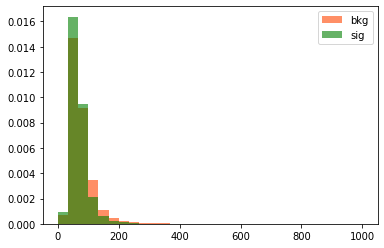

In [10]:
fig, axs = plt.subplots()
axs.hist(bkg_df['MET'],range=[0,1000],bins=30,density=True,alpha=0.6,color='orangered')
axs.hist(signal_df['MET'],range=[0,1000],bins=30,density=True,alpha=0.6,color='green')
plt.legend(('bkg','sig'))
plt.show()

In [11]:
X_train = pd.concat([signal_df[:N_ENTRIES_SIG_TRAIN],bkg_df[:N_ENTRIES_BKG_TRAIN]]) # join signal and bkg


X_bkg_train = X_train[X_train['iD']==0] #used only afterward, when output trees are saved
X_sig_train = X_train[X_train['iD']==1] #used only afterward, when output trees are saved

In [12]:
X_train = X_train.sample(frac=1) # shuffle X_train
Y_train=X_train.copy()           # create Y_train

X_train.pop('iD')                # remove labels from X dataset
for feature in features:         # remove features from Y dataset
    Y_train.pop(feature)

In [13]:
X_train

lep1pT     lep2pT         MET    METsig     DPhib        MT2  \
756288    43.904087  29.164534   70.393288  6.186171  0.023108  33.826298   
282151    63.254929  31.528074   63.921097  5.092209  0.448608   0.274657   
1274088   71.017204  22.907623   54.517826  3.284636  0.486621   0.833912   
745266    44.259251  18.386276   78.954796  6.391883  0.141374  16.913967   
1395088  164.620636  73.474541  105.117729  8.983515  0.518017  27.714922   
...             ...        ...         ...       ...       ...        ...   
1233497   51.846821  19.310072  122.404083  9.419700  0.507109  78.337280   
101581    70.083107  53.284149   38.215633  3.798569  0.271999  31.751402   
281622    40.699509  23.765934   52.956650  4.349539  0.302221  18.323866   
162662    43.538315  26.273849   48.013733  4.789222  0.339991  33.861145   
326731    57.794838  31.685379   55.373878  4.920629  2.893712  64.601341   

         BDTDeltaM30  
756288      0.009928  
282151      0.002476  
1274088     0.188638  
745266      0.307056  
1395088     0.608890  
...              ...  
1233497     0.206140  
101581      0.240293  
281622      0.198909  
162662      0.468705  
326731      0.000026  

[95000 rows x 7 columns]

In [14]:
Y_train

iD
756288    0
282151    0
1274088   0
745266    0
1395088   0
...      ..
1233497   0
101581    0
281622    0
162662    0
326731    0

[95000 rows x 1 columns]

In [15]:
if os.path.isfile('/Users/eric/my_model.h5') is True:
    print ('model already exists')
    #from tf.keras.models import load_model
    model = tf.keras.models.load_model('/Users/eric/my_model.h5')

if os.path.isfile('/Users/eric/my_model.h5') is False:

    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', 
              #optimizer='sgd',
              loss='binary_crossentropy',
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    model.fit(X_train, Y_train, epochs=5)
    model.save('/Users/eric/my_model.h5')

model already exists


In [16]:
X_signal_test=signal_df[N_ENTRIES_SIG_TRAIN:]
X_bkg_test=bkg_df[N_ENTRIES_BKG_TRAIN:]

In [17]:
Y_signal_test = X_signal_test.pop('iD')
Y_bkg_test = X_bkg_test.pop('iD')

In [18]:
X_signal_test

lep1pT      lep2pT         MET    METsig     DPhib        MT2  \
15000   61.240959   42.629070   36.238636  3.222858  0.414617   0.323874   
15001  104.248871  102.188660   54.700874  4.520431  0.276590  26.438330   
15002  162.395279   64.056023   89.915009  7.628190  3.065422  47.349018   
15003   58.411201   25.734634  106.956413  9.345893  0.823429  85.343811   
15004   82.827339   20.241545   37.430202  3.445141  2.067733  37.503101   
...           ...         ...         ...       ...       ...        ...   
31527   50.297905   26.940948   85.885712  6.943843  0.678786  64.192703   
31528   73.125954   25.423283   73.187996  5.901683  2.380257  63.590439   
31529   50.518356   33.794903   56.438660  4.800375  2.964129  67.080162   
31530   34.233837   24.132088  102.623230  8.439701  0.282024  73.993118   
31531  181.947891   37.178783   78.134636  4.352456  0.448730  36.779465   

       BDTDeltaM30  
15000     0.044704  
15001     0.009864  
15002     0.000475  
15003     0.000010  
15004     0.001453  
...            ...  
31527     0.000183  
31528     0.000169  
31529     0.000076  
31530     0.000110  
31531     0.001384  

[16532 rows x 7 columns]

In [19]:
X_bkg_test

lep1pT     lep2pT         MET     METsig     DPhib        MT2  \
237493   176.423340   9.939472   46.533585   4.065610  1.985630   0.125941   
620367    83.378845  34.771618   44.261127   4.330152  2.143616   3.628067   
127599    43.105656  25.597914   38.015419   3.795852  0.566549  29.733854   
1604487   57.532242  29.477386   73.117020   5.361097  0.448683  33.556385   
1324562   42.691032  21.741623   87.778633   6.836620  0.448683  50.934460   
...             ...        ...         ...        ...       ...        ...   
845735    83.636177  25.893391   75.875267   7.095237  1.978644  75.519836   
1057239   69.167564  53.489147   53.521347   4.460044  1.579496  68.124458   
847948   102.563850  70.278587  181.821304  11.827878  0.419010  42.508759   
1275661   31.149351  23.242243   44.461868   3.983478  0.135503  26.425453   
986685    62.090992  51.148678   48.684196   4.154464  2.914294  62.426910   

         BDTDeltaM30  
237493      0.016173  
620367      0.390370  
127599      0.388000  
1604487     0.146088  
1324562     0.003231  
...              ...  
845735      0.000077  
1057239     0.261162  
847948      0.004540  
1275661     0.200808  
986685      0.549704  

[1667325 rows x 7 columns]

In [20]:
#probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
#signal_predictions = probability_model.predict(X_signal_test)
#bkg_predictions = probability_model.predict(X_bkg_test)

signal_predictions = model.predict(X_signal_test)
bkg_predictions = model.predict(X_bkg_test)

In [21]:
signal_predictions

array([[0.0526807 ],
       [0.06163684],
       [0.08974007],
       ...,
       [0.07467186],
       [0.0704138 ],
       [0.01410502]], dtype=float32)

In [22]:
signal_predictions[:,0]

array([0.0526807 , 0.06163684, 0.08974007, ..., 0.07467186, 0.0704138 ,
       0.01410502], dtype=float32)

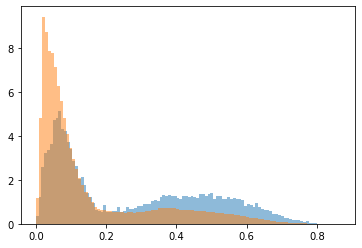

In [23]:
fig, axs = plt.subplots()
axs.hist(signal_predictions[:,0],bins=100,alpha=0.5,density=True)
axs.hist(bkg_predictions[:,0],bins=100,alpha=0.5,density=True)
plt.show()

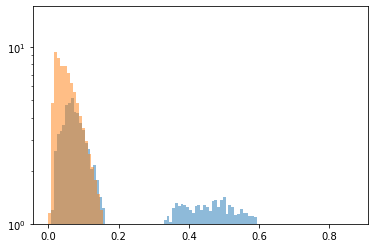

In [24]:
fig, axs = plt.subplots()
axs.hist(signal_predictions[:,0],bins=100,alpha=0.5,density=True)
axs.hist(bkg_predictions[:,0],bins=100,alpha=0.5,density=True)
plt.yscale('log')
axs.set_ylim(bottom=1e0)
plt.show()

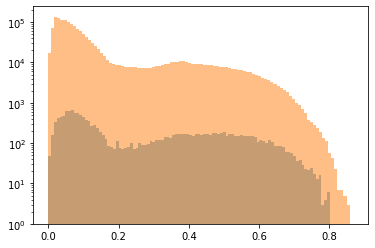

In [25]:
fig, axs = plt.subplots()
axs.hist(signal_predictions[:,0],bins=100,alpha=0.5)
axs.hist(bkg_predictions[:,0],bins=100,alpha=0.5)
plt.yscale('log')
axs.set_ylim(bottom=1e0)
plt.show()

In [26]:
# convert numpy prediction arrays into a list and add this list as the last column of the test dataframe
X_signal_test['ANN'] = signal_predictions[:,0].tolist()
X_bkg_test['ANN'] = bkg_predictions[:,0].tolist()

<ipython-input-26-59083a60ba75>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_signal_test['ANN'] = signal_predictions[:,0].tolist()
<ipython-input-26-59083a60ba75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_bkg_test['ANN'] = bkg_predictions[:,0].tolist()


In [27]:
X_signal_test

lep1pT      lep2pT         MET    METsig     DPhib        MT2  \
15000   61.240959   42.629070   36.238636  3.222858  0.414617   0.323874   
15001  104.248871  102.188660   54.700874  4.520431  0.276590  26.438330   
15002  162.395279   64.056023   89.915009  7.628190  3.065422  47.349018   
15003   58.411201   25.734634  106.956413  9.345893  0.823429  85.343811   
15004   82.827339   20.241545   37.430202  3.445141  2.067733  37.503101   
...           ...         ...         ...       ...       ...        ...   
31527   50.297905   26.940948   85.885712  6.943843  0.678786  64.192703   
31528   73.125954   25.423283   73.187996  5.901683  2.380257  63.590439   
31529   50.518356   33.794903   56.438660  4.800375  2.964129  67.080162   
31530   34.233837   24.132088  102.623230  8.439701  0.282024  73.993118   
31531  181.947891   37.178783   78.134636  4.352456  0.448730  36.779465   

       BDTDeltaM30       ANN  
15000     0.044704  0.052681  
15001     0.009864  0.061637  
15002     0.000475  0.089740  
15003     0.000010  0.145338  
15004     0.001453  0.031185  
...            ...       ...  
31527     0.000183  0.118701  
31528     0.000169  0.077605  
31529     0.000076  0.074672  
31530     0.000110  0.070414  
31531     0.001384  0.014105  

[16532 rows x 8 columns]

In [28]:
X_bkg_test

lep1pT     lep2pT         MET     METsig     DPhib        MT2  \
237493   176.423340   9.939472   46.533585   4.065610  1.985630   0.125941   
620367    83.378845  34.771618   44.261127   4.330152  2.143616   3.628067   
127599    43.105656  25.597914   38.015419   3.795852  0.566549  29.733854   
1604487   57.532242  29.477386   73.117020   5.361097  0.448683  33.556385   
1324562   42.691032  21.741623   87.778633   6.836620  0.448683  50.934460   
...             ...        ...         ...        ...       ...        ...   
845735    83.636177  25.893391   75.875267   7.095237  1.978644  75.519836   
1057239   69.167564  53.489147   53.521347   4.460044  1.579496  68.124458   
847948   102.563850  70.278587  181.821304  11.827878  0.419010  42.508759   
1275661   31.149351  23.242243   44.461868   3.983478  0.135503  26.425453   
986685    62.090992  51.148678   48.684196   4.154464  2.914294  62.426910   

         BDTDeltaM30       ANN  
237493      0.016173  0.010816  
620367      0.390370  0.254719  
127599      0.388000  0.472700  
1604487     0.146088  0.063404  
1324562     0.003231  0.041481  
...              ...       ...  
845735      0.000077  0.048978  
1057239     0.261162  0.038336  
847948      0.004540  0.018730  
1275661     0.200808  0.058192  
986685      0.549704  0.234959  

[1667325 rows x 8 columns]

In [98]:
branches_to_save = ['nlep','njet','isOS','isSF','lep1pT','lep2pT','MET'] # branches to save
#branches_to_save = signal_file.keys()


signal_data_to_save = {} #dictionary
for branch in branches_to_save:
    signal_data_to_save[branch] = np.array(signal_file[branch]) #fill the dictionary
signal_df_output = pd.DataFrame(signal_data_to_save)
signal_df_output


#branches_to_save = VV_file.keys() #assuming are the same between VV and ttbar

bkg_data_to_save = {}
for branch in branches_to_save:
    bkg_data_to_save[branch] = np.concatenate((np.array(VV_file[branch]),np.array(ttbar_file[branch])))
bkg_df_ouput = pd.DataFrame(bkg_data_to_save)
bkg_df_ouput



signal_df_output.insert(0, 'ANN', 0.) # ANN initialized with 0
bkg_df_ouput.insert(0, 'ANN', 0.)     # ANN initialized with 0

In [99]:
# check df names correspond through loc method (Note: this is not the index which is given by iloc and is shifted

In [110]:
# check df names correspond through loc method (Note: this is not the index which is given by iloc and is shifted)
print(signal_df_output.loc[31527]['lep1pT'] == X_signal_test.loc[31527]['lep1pT'])
print(bkg_df_ouput.loc[1747320]['lep1pT'] == X_bkg_test.loc[1747320]['lep1pT'])

True
True


In [104]:
# Fill bkg train set with -1
for entry in X_sig_train.index:
    signal_df_output.at[entry, 'ANN'] = -1.

# Fill bkg test set with ANN
for entry in X_signal_test.index:
    signal_df_output.at[entry, 'ANN'] = X_signal_test.loc[entry]['ANN']

In [105]:
signal_df_output

ANN  nlep  njet  isOS  isSF      lep1pT     lep2pT         MET
0     -1.000000   2.0   0.0   1.0   0.0   73.609718  45.423298   70.389450
1     -1.000000   2.0   0.0   1.0   0.0   90.362343  80.250267   66.593758
2     -1.000000   2.0   0.0   1.0   0.0  144.737686  57.063747   48.827950
3     -1.000000   2.0   0.0   1.0   0.0   62.507576  12.994293   67.977264
4     -1.000000   2.0   0.0   1.0   0.0   55.535378  21.134953   40.985008
...         ...   ...   ...   ...   ...         ...        ...         ...
31527  0.118701   2.0   2.0   1.0   1.0   50.297905  26.940948   85.885712
31528  0.077605   2.0   2.0   1.0   1.0   73.125954  25.423283   73.187996
31529  0.074672   2.0   2.0   1.0   1.0   50.518356  33.794903   56.438660
31530  0.070414   2.0   2.0   1.0   1.0   34.233837  24.132088  102.623230
31531  0.014105   2.0   2.0   1.0   1.0  181.947891  37.178783   78.134636

[31532 rows x 8 columns]

In [102]:
# Fill bkg train set with -1
for entry in X_bkg_train.index:
    bkg_df_ouput.at[entry, 'ANN'] = -1.

# Fill bkg test set with ANN
for entry in X_bkg_test.index:
    bkg_df_ouput.at[entry, 'ANN'] = X_bkg_test.loc[entry]['ANN']

In [103]:
bkg_df_ouput

ANN  nlep  njet  isOS  isSF      lep1pT     lep2pT         MET
0       -1.000000   2.0   0.0   1.0   0.0   59.078079  31.822832   40.321709
1        0.327079   2.0   0.0   1.0   0.0   30.359299  19.849819   34.510422
2        0.171320   2.0   0.0   1.0   0.0   46.625546   9.596267   36.656677
3        0.339393   2.0   0.0   1.0   0.0   31.296329  13.092647   30.332579
4        0.494155   2.0   0.0   1.0   0.0   47.931690  15.234454   46.149456
...           ...   ...   ...   ...   ...         ...        ...         ...
1747320  0.053438   2.0   2.0   1.0   1.0   99.808540  12.073832   94.595840
1747321 -1.000000   2.0   2.0   1.0   1.0  128.595078  32.629875   65.385132
1747322  0.025090   2.0   2.0   1.0   1.0   70.635284  64.060532  137.265900
1747323  0.021935   2.0   2.0   1.0   1.0   55.749294  19.952198  179.038712
1747324  0.059099   2.0   2.0   1.0   1.0   68.534508  33.479336   50.550526

[1747325 rows x 8 columns]